This notebook explores Constant Overlap-Add (COLA) windowing approaches to determine which one is the best for our overlap-and-add convolution approach. The 2D window is created as the outer product of 1D windows, which maintains separability and COLA properties in both dimensions. Types of window function:
- Hann: Smooth cosine taper, goes to zero at edges with zero derivative. COLA-compliant at 50%, 66.67%, 75% overlap.
- Tukey: Flat center region with cosine-tapered edges. Good when we want the PSF to be "pure" in the center and only blend at edges. Alpha controls the fraction of the window that is tapered. alpha=0.0: Rectangular window (no taper, causes hard edges), alpha=0.25: 25% taper on each side, 50% flat center, alpha=0.5: 50% taper on each side, no flat center, alpha=1.0: Equivalent to Hann window.
- Bartlett: Linear taper (triangular). Has discontinuous derivative at boundaries, which can cause visible seams.

Notes
For COLA (Constant Overlap-Add) compliance, use:
- Hann: 50%, 66.67%, or 75% overlap
- Tukey: 50%, 62.5% or 75% overlap

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
def create_window_2d(size, window_type='hann', tukey_alpha=0.5):
    if window_type == 'hann':
        window_1d = signal.windows.hann(size, sym=True)
    elif window_type == 'tukey':
        window_1d = signal.windows.tukey(size, alpha=tukey_alpha, sym=True)
    elif window_type == 'bartlett':
        window_1d = signal.windows.bartlett(size)
    else:
        raise ValueError(f"Unknown window type: {window_type}. "
                        f"Supported: 'hann', 'tukey', 'bartlett'")

    window_2d = np.outer(window_1d, window_1d)

    return window_2d

In [3]:
def visualize_window_comparison(patch_size=128):    
    windows = {
        'Bartlett': create_window_2d(patch_size, 'bartlett'),
        'Tukey (α=0.25)': create_window_2d(patch_size, 'tukey', 0.25),
        'Tukey (α=0.75)': create_window_2d(patch_size, 'tukey', 0.5),
        'Tukey (α=1.0)': create_window_2d(patch_size, 'tukey', 1.0),
        'Hann': create_window_2d(patch_size, 'hann'),
    }

    _, axes = plt.subplots(2, len(windows), figsize=(15, 6))

    for idx, (name, window) in enumerate(windows.items()):
        # 2d window
        axes[0, idx].imshow(window, cmap='viridis')
        axes[0, idx].set_title(name)
        axes[0, idx].axis('off')

        # 1d cross-section through center
        center = patch_size // 2
        axes[1, idx].plot(window[center, :], 'b-', linewidth=2)
        axes[1, idx].set_ylim(-0.05, 1.05)
        axes[1, idx].set_xlabel('Position')
        axes[1, idx].set_ylabel('Weight')
        axes[1, idx].grid(True, alpha=0.3)

    plt.suptitle('Window Function Comparison\nTop: 2D window, Bottom: 1D cross-section', fontsize=12)
    plt.tight_layout()
    plt.show()

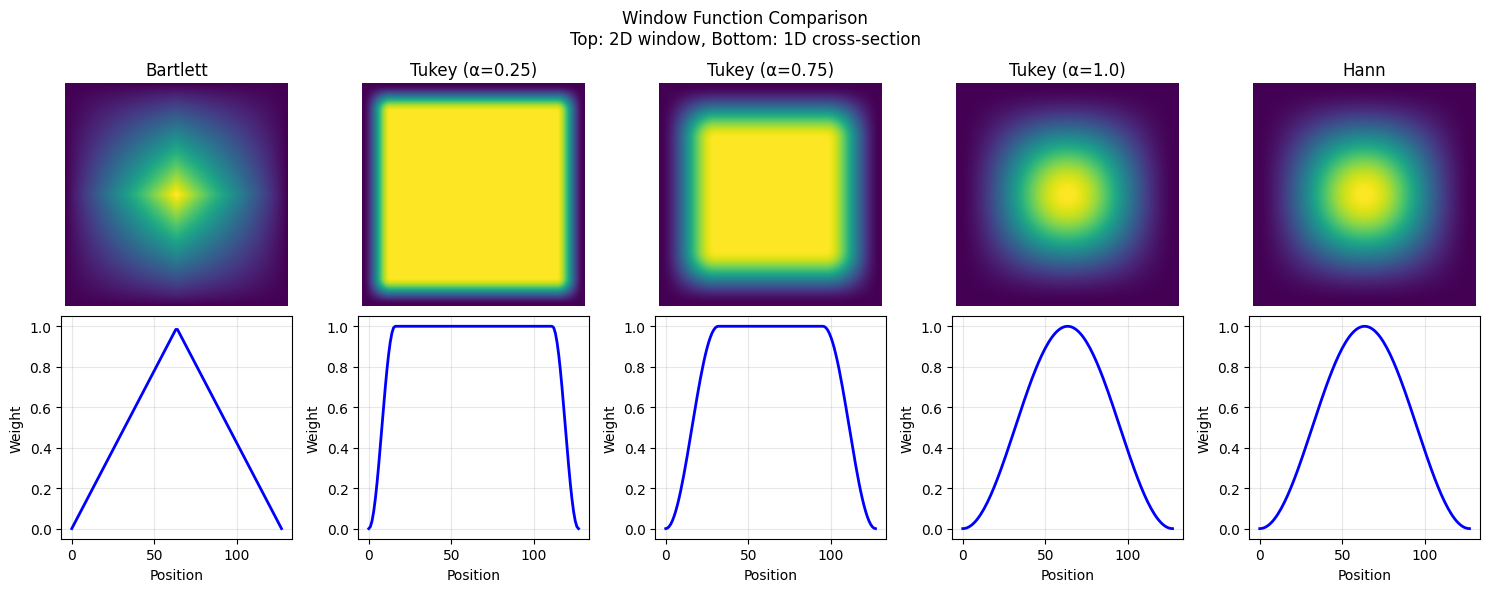

In [4]:
visualize_window_comparison(patch_size=128)